In [1]:
# %matplotlib notebook
from IPython.display import display, IFrame, HTML

import numpy             as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from matplotlib          import rc 
from matplotlib          import cm

import corner
import emcee

from tqdm import tqdm

from scipy.integrate import dblquad
from scipy.integrate import quad

In [2]:
def Cauchy(p,x):
    
    x0, gamma = p
    
    return 1/(np.pi*gamma*(1+np.square((x-x0)/gamma)))

In [3]:
def LogPrior(p):
    
    x0, gamma = p
    
    if -1 <= x0 <= 1. and 0. <= gamma <= 2.:
        return 0.
    else:
        return -np.inf

In [4]:
def Likelihood(p,x):
    return Cauchy(p,x)

In [5]:
def JointLikelihood(p,x):
    return np.sum( np.log(Likelihood(p,x)) )

In [6]:
def LogPosterior(p,x):
    
    LogP = LogPrior(p)
    
    if not np.isfinite(LogP):
        return -np.inf
    else:
        return JointLikelihood(p,x) + LogP

In [7]:
n_walkers, n_params = 5,2  #5 cadenas de Markov con 2 parámetros
p0 = np.zeros((n_walkers,n_params))
p0[:,0] = -1.
p0[:,1] = 0.
p0 += np.random.rand(n_walkers,n_params) #Walkers deben ser li
p0

array([[-0.38006307,  0.33134787],
       [-0.28208664,  0.46509288],
       [-0.41150558,  0.40848765],
       [-0.2358592 ,  0.89383541],
       [-0.01633009,  0.20271018]])

In [8]:
muestra = np.random.standard_cauchy(1000)

In [9]:
sampler = emcee.EnsembleSampler(n_walkers,n_params,LogPosterior,args=[muestra])

In [10]:
pos, prob, state = sampler.run_mcmc(p0, 5000, progress=True)

100%|██████████| 5000/5000 [00:02<00:00, 2051.26it/s]


Text(0.5, 0, 'step number')

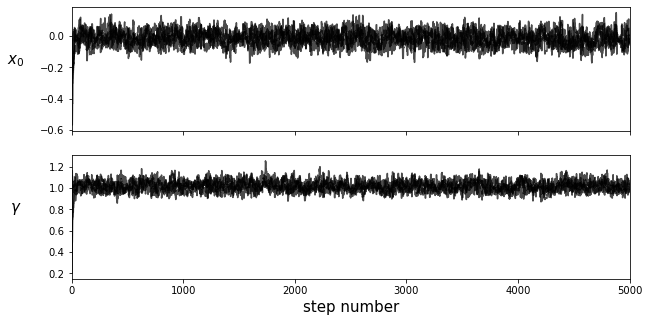

In [11]:
fig, axes = plt.subplots(n_params, figsize=(10, 5), sharex=True)

samples = sampler.get_chain()
labels = ["$x_0$","$\gamma$"]

for i in range(n_params):
    
    ax = axes[i]
    ax.plot(samples[:,:,i], "k", alpha=0.7)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i],rotation=0, fontsize=15)
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number",fontsize=15)

In [12]:
flat_samples = sampler.get_chain(discard=1000, thin=15, flat=True)
truths = np.percentile(pos, 50, axis=0)

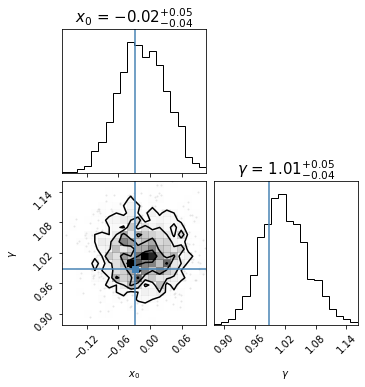

In [13]:
figure = corner.corner(flat_samples, 
                       truths=truths, 
                       labels=labels,
                       title_quantiles = None,
                       show_titles=True,
                       title_kwargs={"fontsize":15})